### 참고사항
 - 다중공성선 제거 방법 : regularization


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))
pd.set_option("display.max_columns", 45)

In [2]:
df = pd.read_csv('Data/datas0402.csv')

In [3]:
year = pd.read_csv('./year_start_cont.csv')

In [4]:
prize = pd.read_csv('./Data/Prize.csv')

In [5]:
prize[prize['이름'] == '이대호']

Unnamed: 0   이름    시즌     수상
19          19  이대호           수상
20          20  이대호  2001      0
21          21  이대호  2002      0
22          22  이대호  2003      0
23          23  이대호  2004      0
24          24  이대호  2005  ALMVP
25          25  이대호  2006     GG
26          26  이대호  2007     GG
27          27  이대호  2008  ALMVP
28          28  이대호  2009      0
29          29  이대호  2010     GG
30          30  이대호  2011     GG
31          31  이대호  2012      0
32          32  이대호  2013      0
33          33  이대호  2014      0
34          34  이대호  2015      0
35          35  이대호  2016      0
36          36  이대호  2017     GG
37          37  이대호  2018     GG

In [6]:
prize['시즌'] = prize['시즌'].apply(lambda x : 0 if len(x)<4 else x)

In [7]:
prize['시즌'] = prize['시즌'].astype(int)

In [8]:
prize = pd.DataFrame(prize)

In [9]:
year = year[year['데뷔'] != 0]

In [10]:
df = pd.merge(df, year, on='이름', how='inner')

In [11]:
df = df.drop_duplicates()
df

ID   이름    시즌   팀 포지션  나이      G     타석     타수     득점     안타     타1  \
0       0  테임즈  2014  NC  1B  29  125.0  514.0  443.0   95.0  152.0   79.0   
3       0  테임즈  2015  NC  1B  30  142.0  595.0  472.0  130.0  180.0   86.0   
6       0  테임즈  2016  NC  1B  31  123.0  529.0  436.0  118.0  140.0   67.0   
9       1  이대호  2010  롯데  3B  29  127.0  552.0  478.0   99.0  174.0  117.0   
14      1  이대호  2011  롯데  1B  30  133.0  570.0  493.0   76.0  176.0  122.0   
...   ...  ...   ...  ..  ..  ..    ...    ...    ...    ...    ...    ...   
3004  234  조동화  2015  SK  CF  35  119.0  304.0  245.0   38.0   64.0   55.0   
3011  234  조동화  2016  SK  RF  36   76.0  172.0  143.0   24.0   34.0   29.0   
3018  258  강귀태  2011  넥센   C  33   33.0   89.0   81.0    4.0   19.0   13.0   
3021  306  이영우  2010  한화  DH  38   12.0   21.0   21.0    0.0    2.0    2.0   
3022  379  박기혁  2010  롯데  SS  30   48.0  166.0  153.0   10.0   33.0   30.0   

        타2   타3    홈런     루타     타점    도루   도실     볼넷    사구    고4     삼진  \
0     30.0  6.0  37.0  305.0  121.0  11.0  2.0   58.0   7.0   5.0   99.0   
3     42.0  5.0  47.0  373.0  140.0  40.0  8.0  103.0  13.0  11.0   91.0   
6     30.0  3.0  40.0  296.0  121.0  13.0  4.0   74.0  12.0   6.0  103.0   
9     13.0  0.0  44.0  319.0  133.0   0.0  2.0   61.0  10.0   6.0   77.0   
14    26.0  1.0  27.0  285.0  113.0   2.0  0.0   63.0   8.0   8.0   60.0   
...    ...  ...   ...    ...    ...   ...  ...    ...   ...   ...    ...   
3004   6.0  1.0   2.0   78.0   15.0  18.0  3.0   30.0   5.0   0.0   50.0   
3011   5.0  0.0   0.0   39.0   16.0   6.0  2.0   15.0   4.0   0.0   17.0   
3018   4.0  1.0   1.0   28.0   10.0   1.0  0.0    5.0   0.0   1.0   11.0   
3021   0.0  0.0   0.0    2.0    0.0   0.0  1.0    0.0   0.0   0.0    2.0   
3022   3.0  0.0   0.0   36.0   13.0   2.0  0.0    6.0   1.0   0.0   18.0   

        병살    희타   희비     타율     출루     장타    OPS   wOBA    wRC  twoBLUCK  \
0      6.0   0.0  6.0  0.343  0.422  0.688  1.111  0.464  168.3  0.097720   
3      7.0   0.0  7.0  0.381  0.498  0.790  1.288  0.530  222.3  0.125749   
6      2.0   0.0  7.0  0.321  0.427  0.679  1.106  0.463  170.5  0.102389   
9     15.0   0.0  3.0  0.364  0.444  0.667  1.111  0.482  192.4  0.036415   
14    22.0   0.0  6.0  0.357  0.433  0.578  1.011  0.455  180.0  0.064039   
...    ...   ...  ...    ...    ...    ...    ...    ...    ...       ...   
3004   2.0  22.0  2.0  0.261  0.351  0.318  0.669  0.297   68.3  0.031088   
3011   2.0   8.0  2.0  0.238  0.323  0.273  0.596  0.279   48.9  0.039683   
3018   4.0   2.0  1.0  0.235  0.276  0.346  0.622  0.277   60.3  0.057971   
3021   0.0   0.0  0.0  0.095  0.095  0.095  0.191  0.090  -66.7  0.000000   
3022   5.0   5.0  1.0  0.216  0.248  0.235  0.484  0.225   22.8  0.022222   

      threeBLUCK    ISO       BBK   ISOD        연봉  횟수  경험    데뷔         학력  \
0       0.019544  0.345  0.079767  0.079   25000.0   1   0  2014     용병-용병대   
3       0.014970  0.409 -0.020168  0.117  125000.0   2   1  2014     용병-용병대   
6       0.010239  0.358  0.054820  0.106  125000.0   3   2  2014     용병-용병대   
9       0.000000  0.303  0.028986  0.080   39000.0   1   0  2001        경남고   
14      0.002463  0.221 -0.005263  0.076   63000.0   2   1  2001        경남고   
...          ...    ...       ...    ...       ...  ..  ..   ...        ...   
3004    0.005181  0.057  0.065789  0.090   30000.0   2   4  2001        공주고   
3011    0.000000  0.035  0.011628  0.085   30000.0   3   5  2001        공주고   
3018    0.014493  0.111  0.067416  0.041   10000.0   1   0  2002  인천동산고-동국대   
3021    0.000000  0.000  0.095238  0.000   13000.0   1   0  1996   선린인고-건국대   
3022    0.000000  0.019  0.072289  0.032   12000.0   1   0  2000      대구상원고   

                                     계약  
0                                ['연도']  
3                                ['연도']  
6                                ['연도']  
9     ['연도', '2001년', '2012년', '2017년']  
14    ['연도', '2001년', '2012년', '2017년']  
...                            

In [12]:
df1 = pd.merge(df, prize, on=['이름', '시즌'], how='outer')

In [13]:
df1 = df1.dropna(thresh=6, axis=0)

In [14]:
df1['수상'][df1.수상.isna()] = '0'

In [15]:
df1.수상.unique()

array(['0', 'GG', 'POMVP', 'ALMVP', 'SPMVP', 'HSMVP'], dtype=object)

In [19]:
df1['수상N'] = None
for x in df1['수상']:
    if x != '0':
        df1['수상N'][df1['수상']==x] = 1
    else:
        df1['수상N'][df1['수상']==x] = 0

In [52]:
df1['수상N'] = df1['수상N'].astype(int)

In [22]:
import missingno as msno

msno.matrix(df1)
plt.show()

Text(0.5, 1.0, '시즌별 연봉 중앙값')

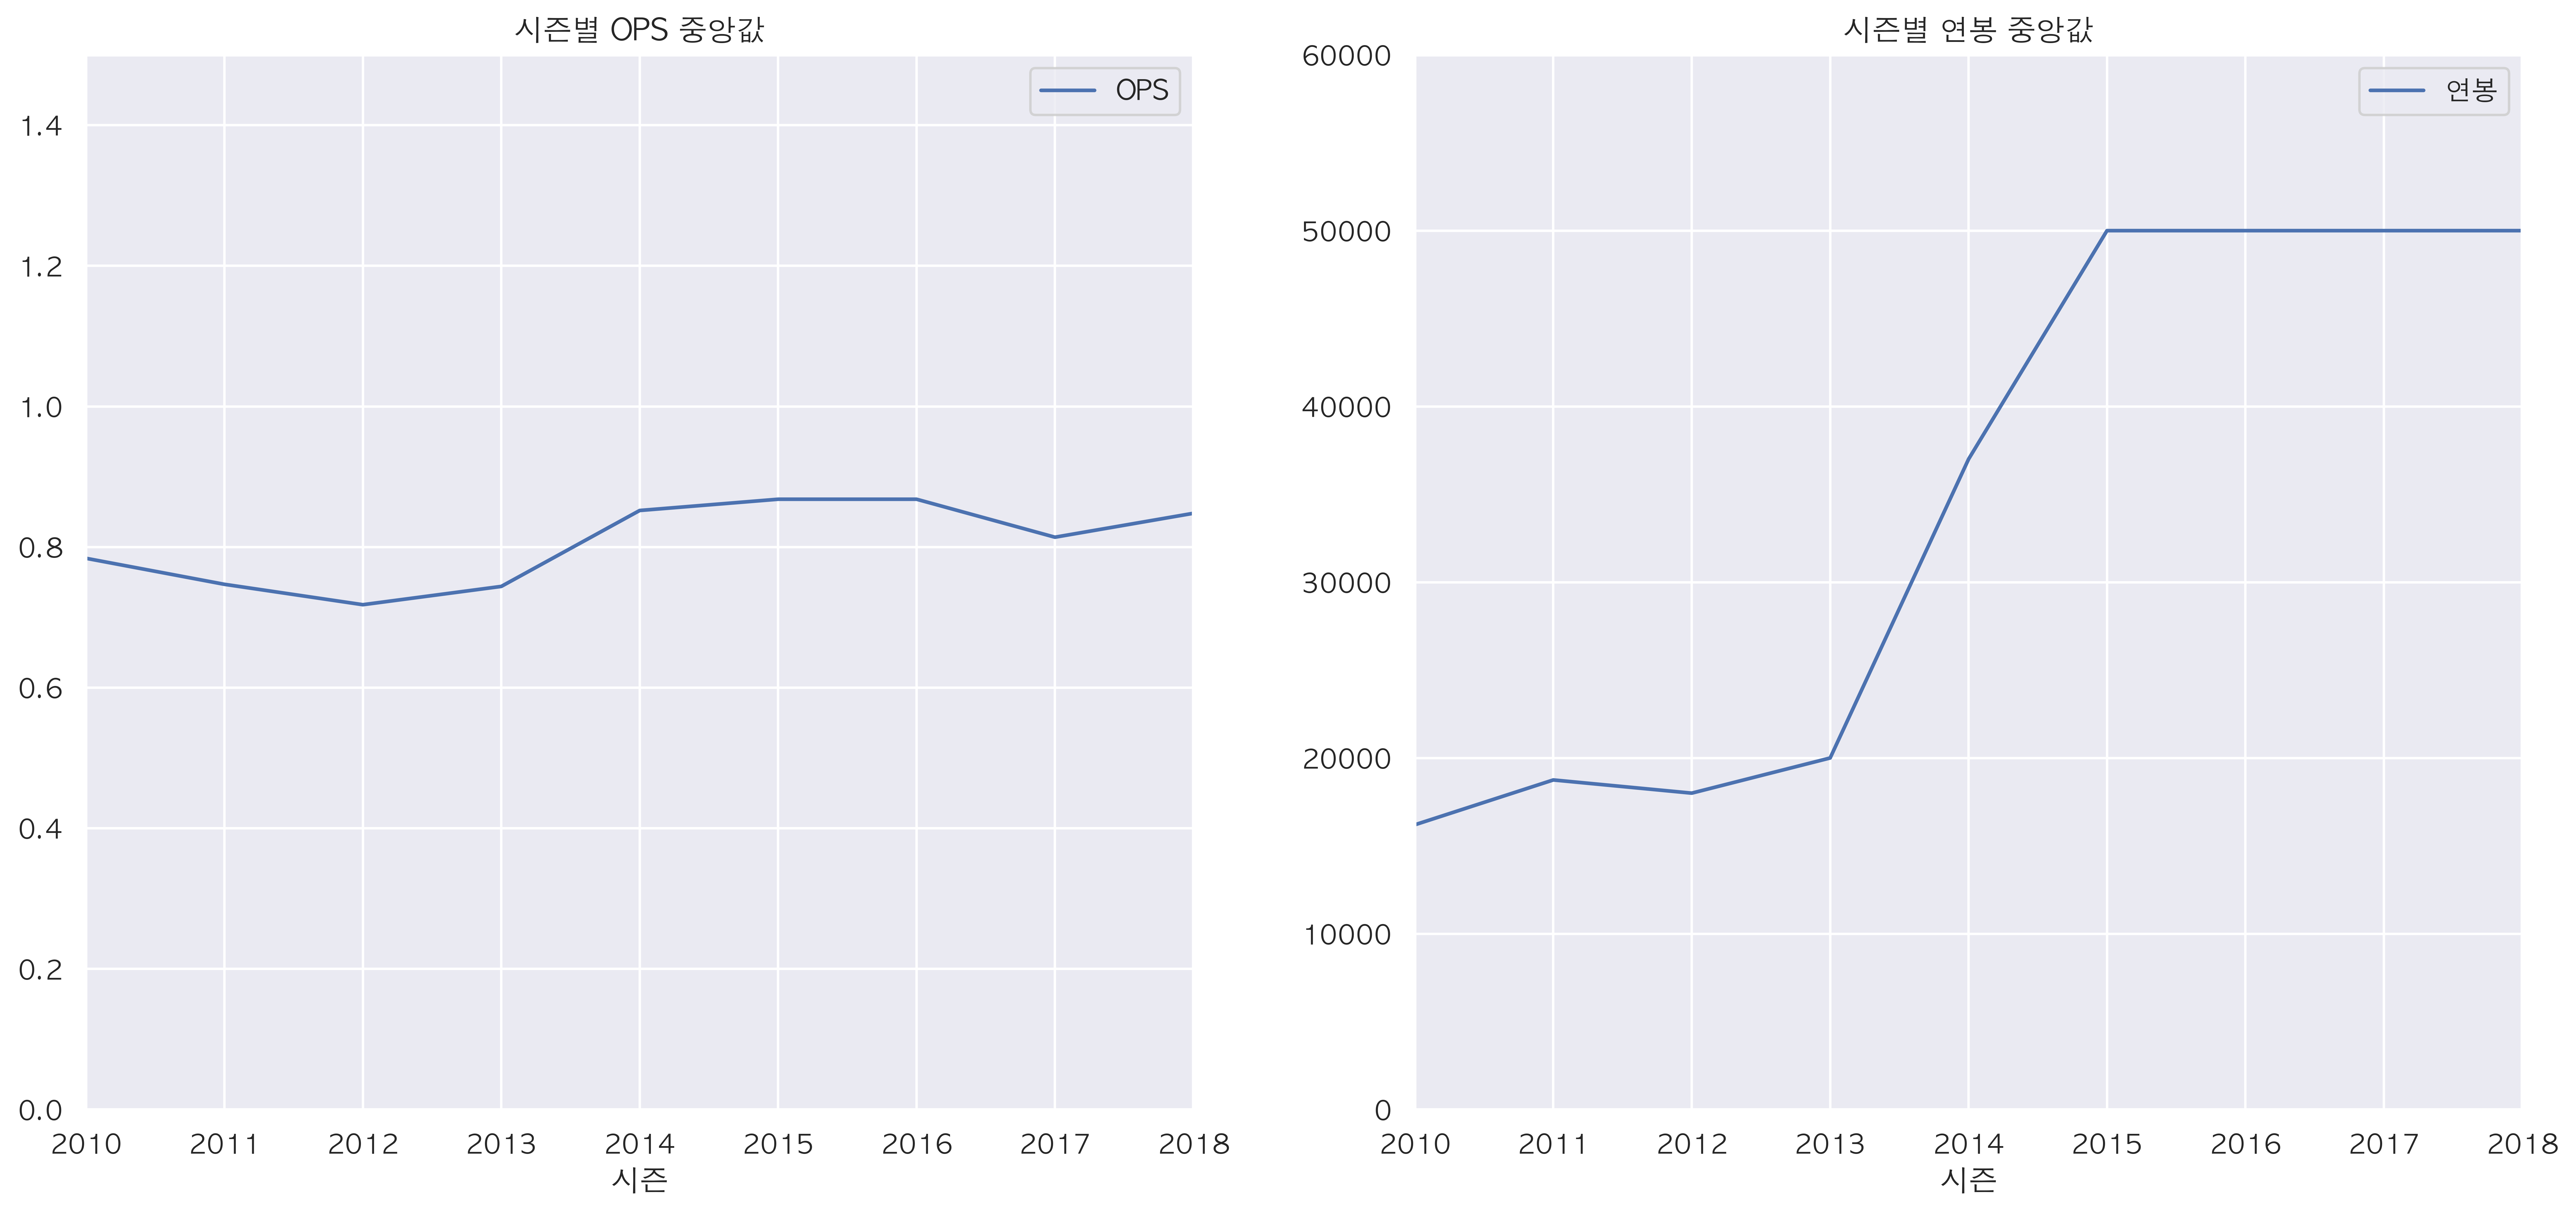

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df1[['시즌', 'OPS']].groupby('시즌').median().plot(ax=ax[0])
ax[0].set_ylim(0,1.5)
ax[0].set_title('시즌별 OPS 중앙값')
df1[['시즌', '연봉']].groupby('시즌').median().plot(ax=ax[1])
ax[1].set_ylim(0,60000)
ax[1].set_title('시즌별 연봉 중앙값')

In [26]:
df1['시즌C'] = df1.시즌.apply(lambda x: 0 if x <= 2013 else x)
df1['시즌C'] = df1.시즌C.apply(lambda x: 1 if  x== 2014 else x)
df1['시즌C'] = df1.시즌C.apply(lambda x: 2 if x > 2014 else x)

In [27]:
df1['경험N'] = df1['시즌'] - df1['데뷔']

In [28]:
#train = df[df.시즌 <= 2017]
#test = df[df.시즌 == 2018]

In [29]:
import re
names = df.이름.unique()
df1['외국인'] = None
for name in names:
    if re.findall('[에, 브, 워, 대, 피, 히, 버, 러, 칸, 루, 필, 파, 스, 아,마, 가, 초, 모, 로, 발, 번, 테, 호]', name[0]):
        df1['외국인'][df1['이름'] == name] = 1
    else:
        df1['외국인'][df1['이름'] == name] = 0

In [30]:
df1['BABIP'] = (df1['안타'] - df1['홈런'])/(df1['타수'] - df1['삼진']-df1['홈런'] - df1['희비'])

In [31]:
a = ['나바로', '조쉬벨', '고메즈']
for name in a:
    df1['외국인'][df1['이름'] == name] = 1

In [32]:
df1['이적'] = None
for x in df1['이름']:
    df1['이적'][df1['이름'] == x] = len(df1[df1['이름'] == x]['팀'].unique()) -1

In [36]:
df1['이적C'] = df1.이적.apply(lambda x: 0 if x <= 2 else x)
df1['이적C'] = df1.이적C.apply(lambda x: 1 if x > 2 else x)
#df['이적C'] = df.이적C.apply(lambda x: 2 if x >= 3 else x)
#df['이적C'] = df.이적C.apply(lambda x: 3 if x >= 3 else x)

In [37]:
df1['나이C'] = df1.나이.apply(lambda x: 0 if x <= 23 else x)
df1['나이C'] = df1.나이C.apply(lambda x: 1 if 26 >= x > 23 else x)
df1['나이C'] = df1.나이C.apply(lambda x: 2 if 33 >= x > 26 else x)
df1['나이C'] = df1.나이C.apply(lambda x: 3 if 37 >= x > 33 else x)
df1['나이C'] = df1.나이C.apply(lambda x: 4 if 40 >= x > 37 else x)
df1['나이C'] = df1.나이C.apply(lambda x: 5 if x >= 40 else x)

(0, 46000)

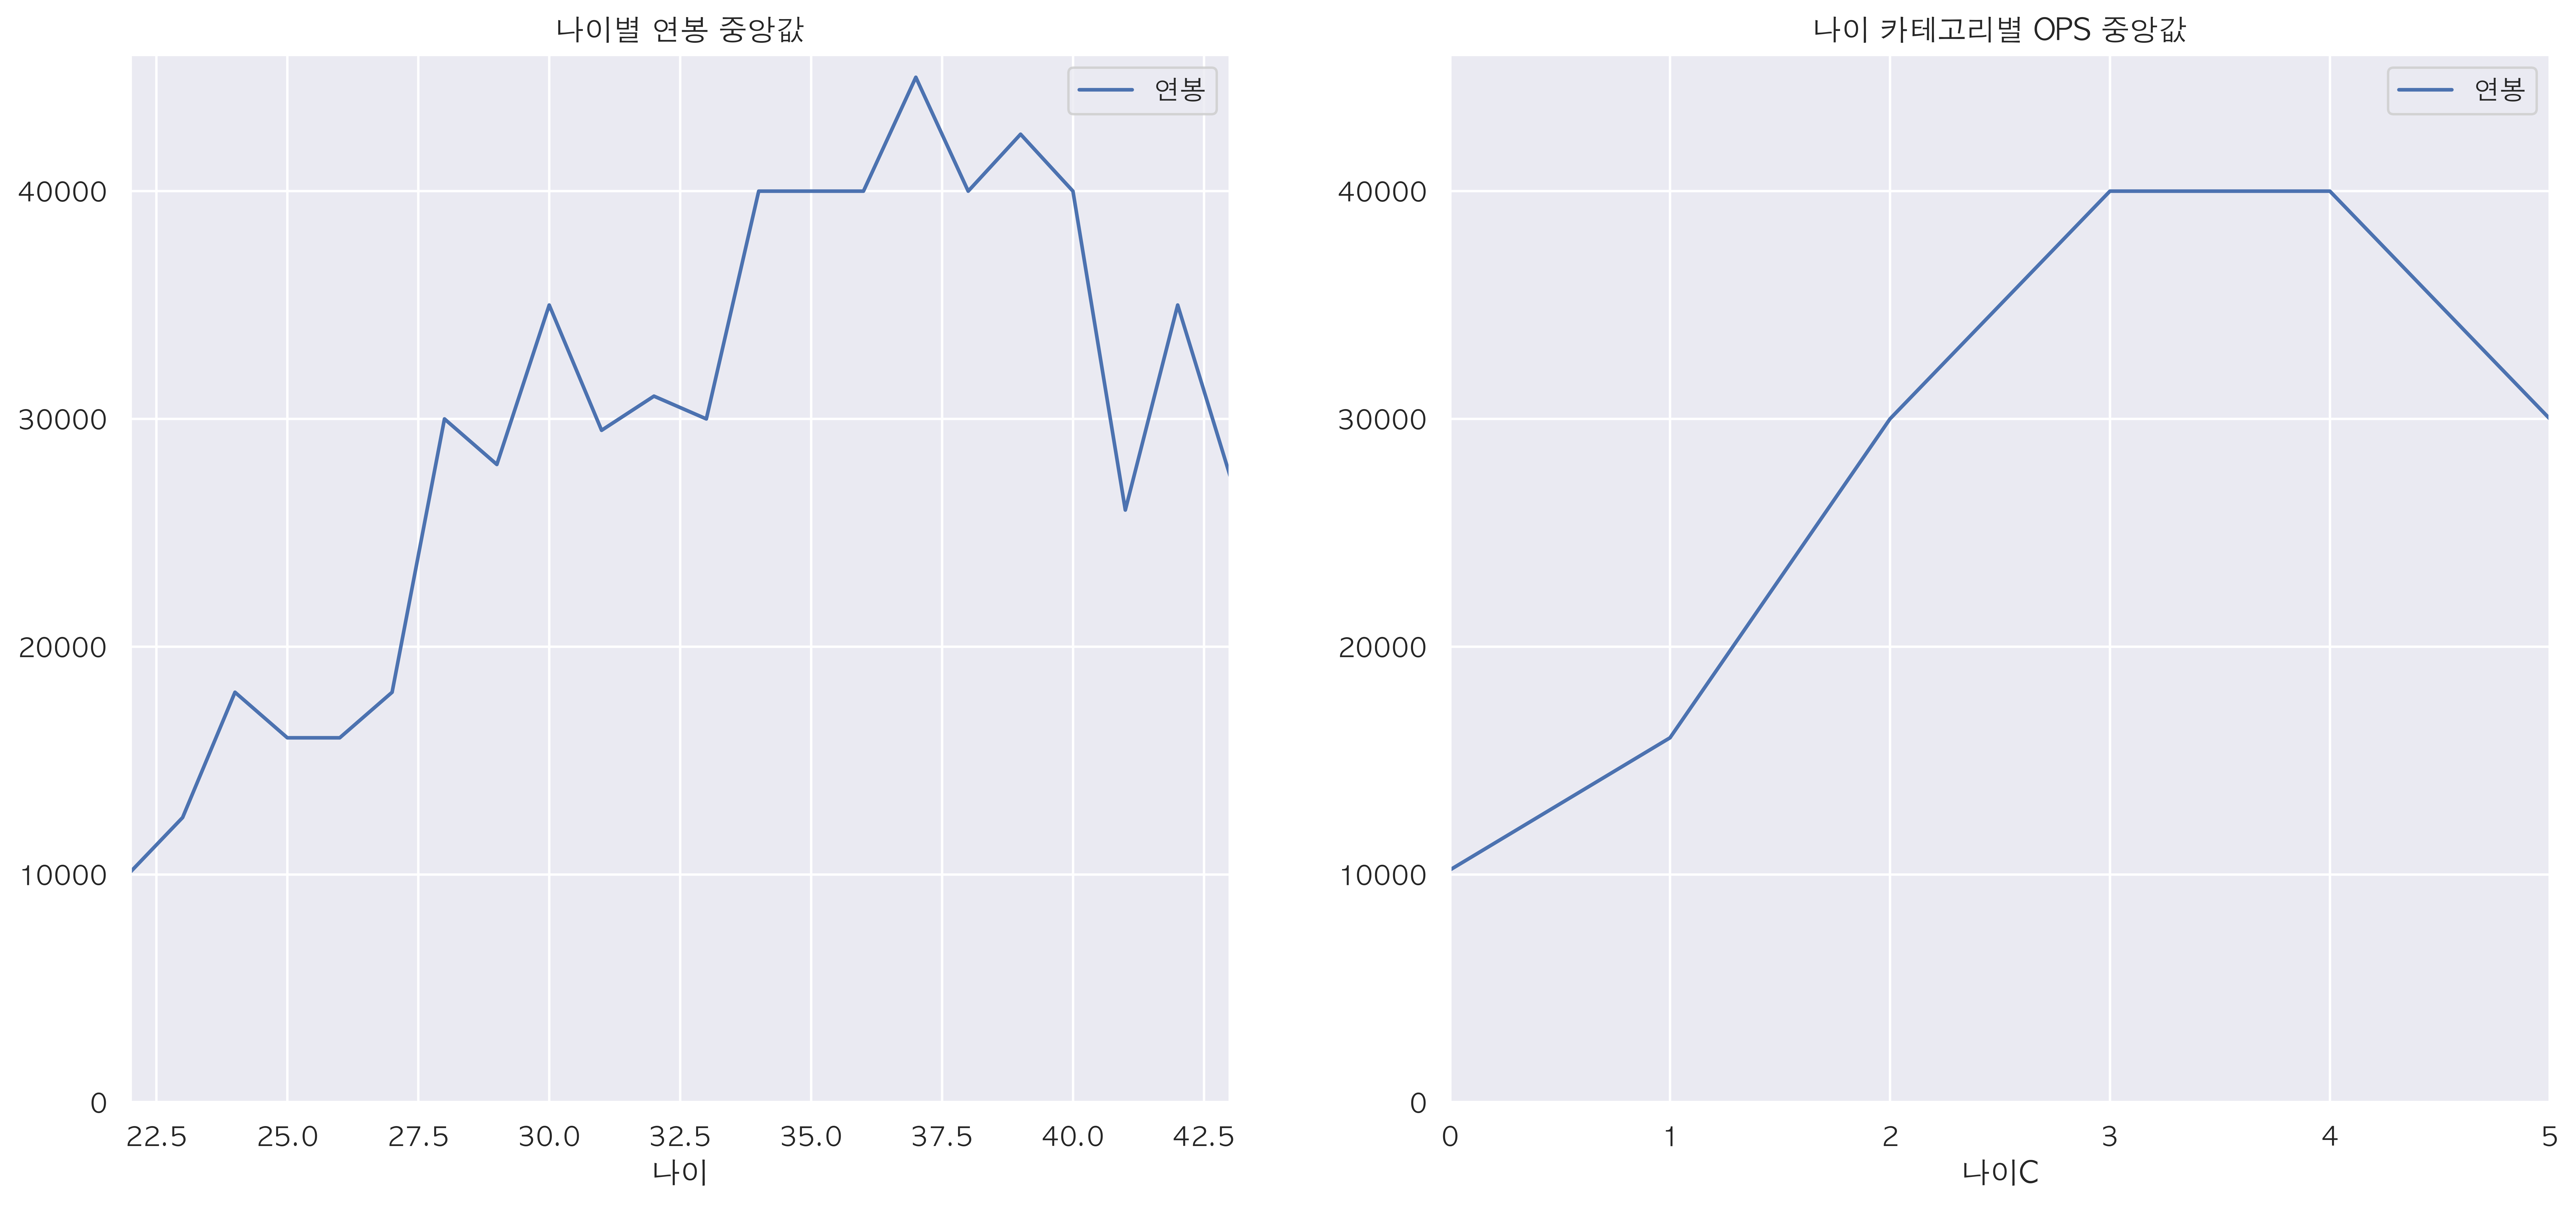

In [38]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df1[['나이', '연봉']].groupby('나이').median().plot(ax=ax[0])
ax[0].set_title('나이별 연봉 중앙값')
ax[0].set_ylim(0, 46000)

df1[['나이C', '연봉']].groupby('나이C').median().plot(ax=ax[1])
ax[1].set_title('나이 카테고리별 OPS 중앙값')
ax[1].set_ylim(0, 46000)

In [39]:
df1['이적'] = df1['이적'].astype(float)

In [40]:
sns.jointplot(x='이적', y='연봉', data=df1)
plt.show()

In [41]:
df1.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '학력', '계약',
       'Unnamed: 0', '수상', '수상N', '시즌C', '경험N', '외국인', 'BABIP', '이적', '이적C',
       '나이C'],
      dtype='object')

In [42]:
df1['K'] = df1['삼진']/(df1['타석'] - df1['고4'])

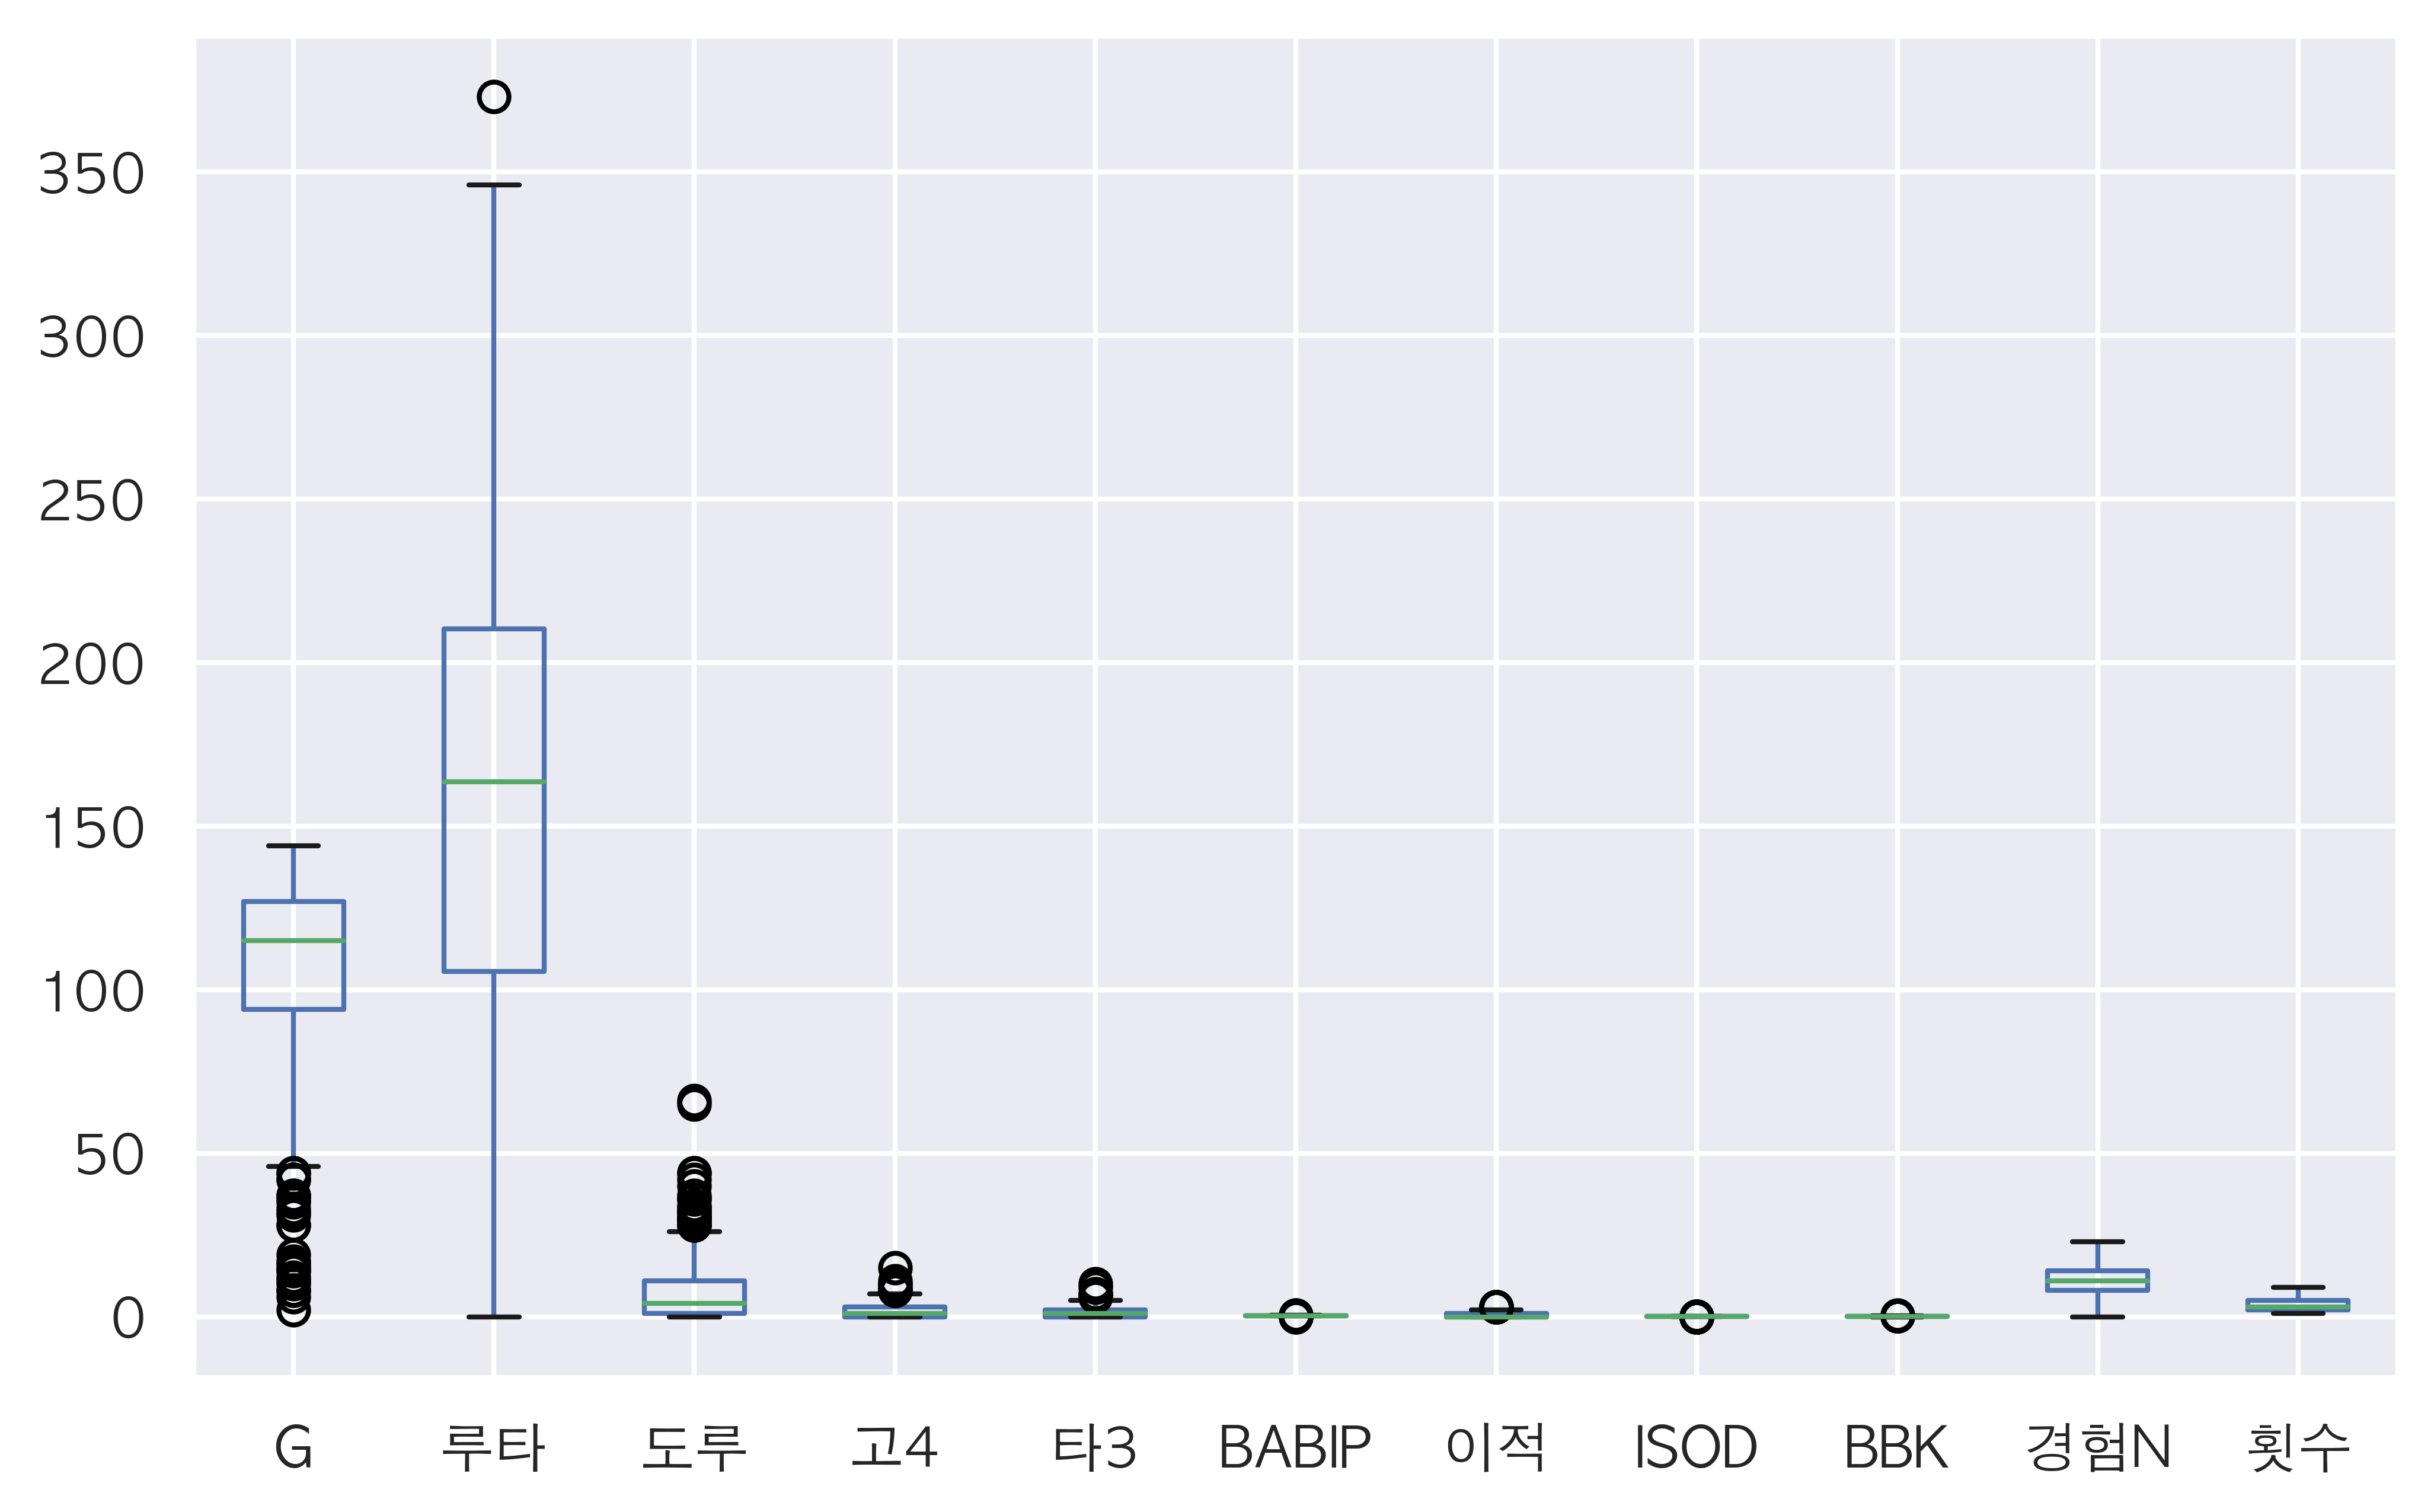

In [43]:
# 변수마다 차이가 커서 scaling을 해줘야 함

df1[['G', '루타', '도루', '고4', '타3', 'BABIP', '이적', 'ISOD', 'BBK', '경험N', '횟수']].plot.box()
plt.show()

In [44]:
# 전성기인 27살에 가장 높은 연봉을 받을 것이다 => 30대 연봉이 더 높았고
# 학력은 별 상관 없는 듯.

In [45]:
model = sm.OLS.from_formula(
    '연봉 ~ C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     연봉   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     26.48
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.23e-56
Time:                        20:41:49   Log-Likelihood:                -4255.3
No. Observations:                 376   AIC:                             8551.
Df Residuals:                     356   BIC:                             8629.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3.391e+

In [46]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=1)
for i, (idx_train, idx_test) in enumerate(cv.split(df1)):
    df_train = df1.iloc[idx_train]
    df_test = df1.iloc[idx_test]
    model = sm.OLS.from_formula(
        '연봉 ~ C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(홈런) + scale(루타) + scale(도루)\
        +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.연봉 - pred) ** 2).sum()
    tss = ((df_test.연봉 - df_test.연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.66439718, 검증 R2 = 0.38861738
학습 R2 = 0.59538566, 검증 R2 = 0.44330953
학습 R2 = 0.58181001, 검증 R2 = 0.57209098
학습 R2 = 0.57655754, 검증 R2 = 0.55747104
학습 R2 = 0.57366427, 검증 R2 = 0.58646051


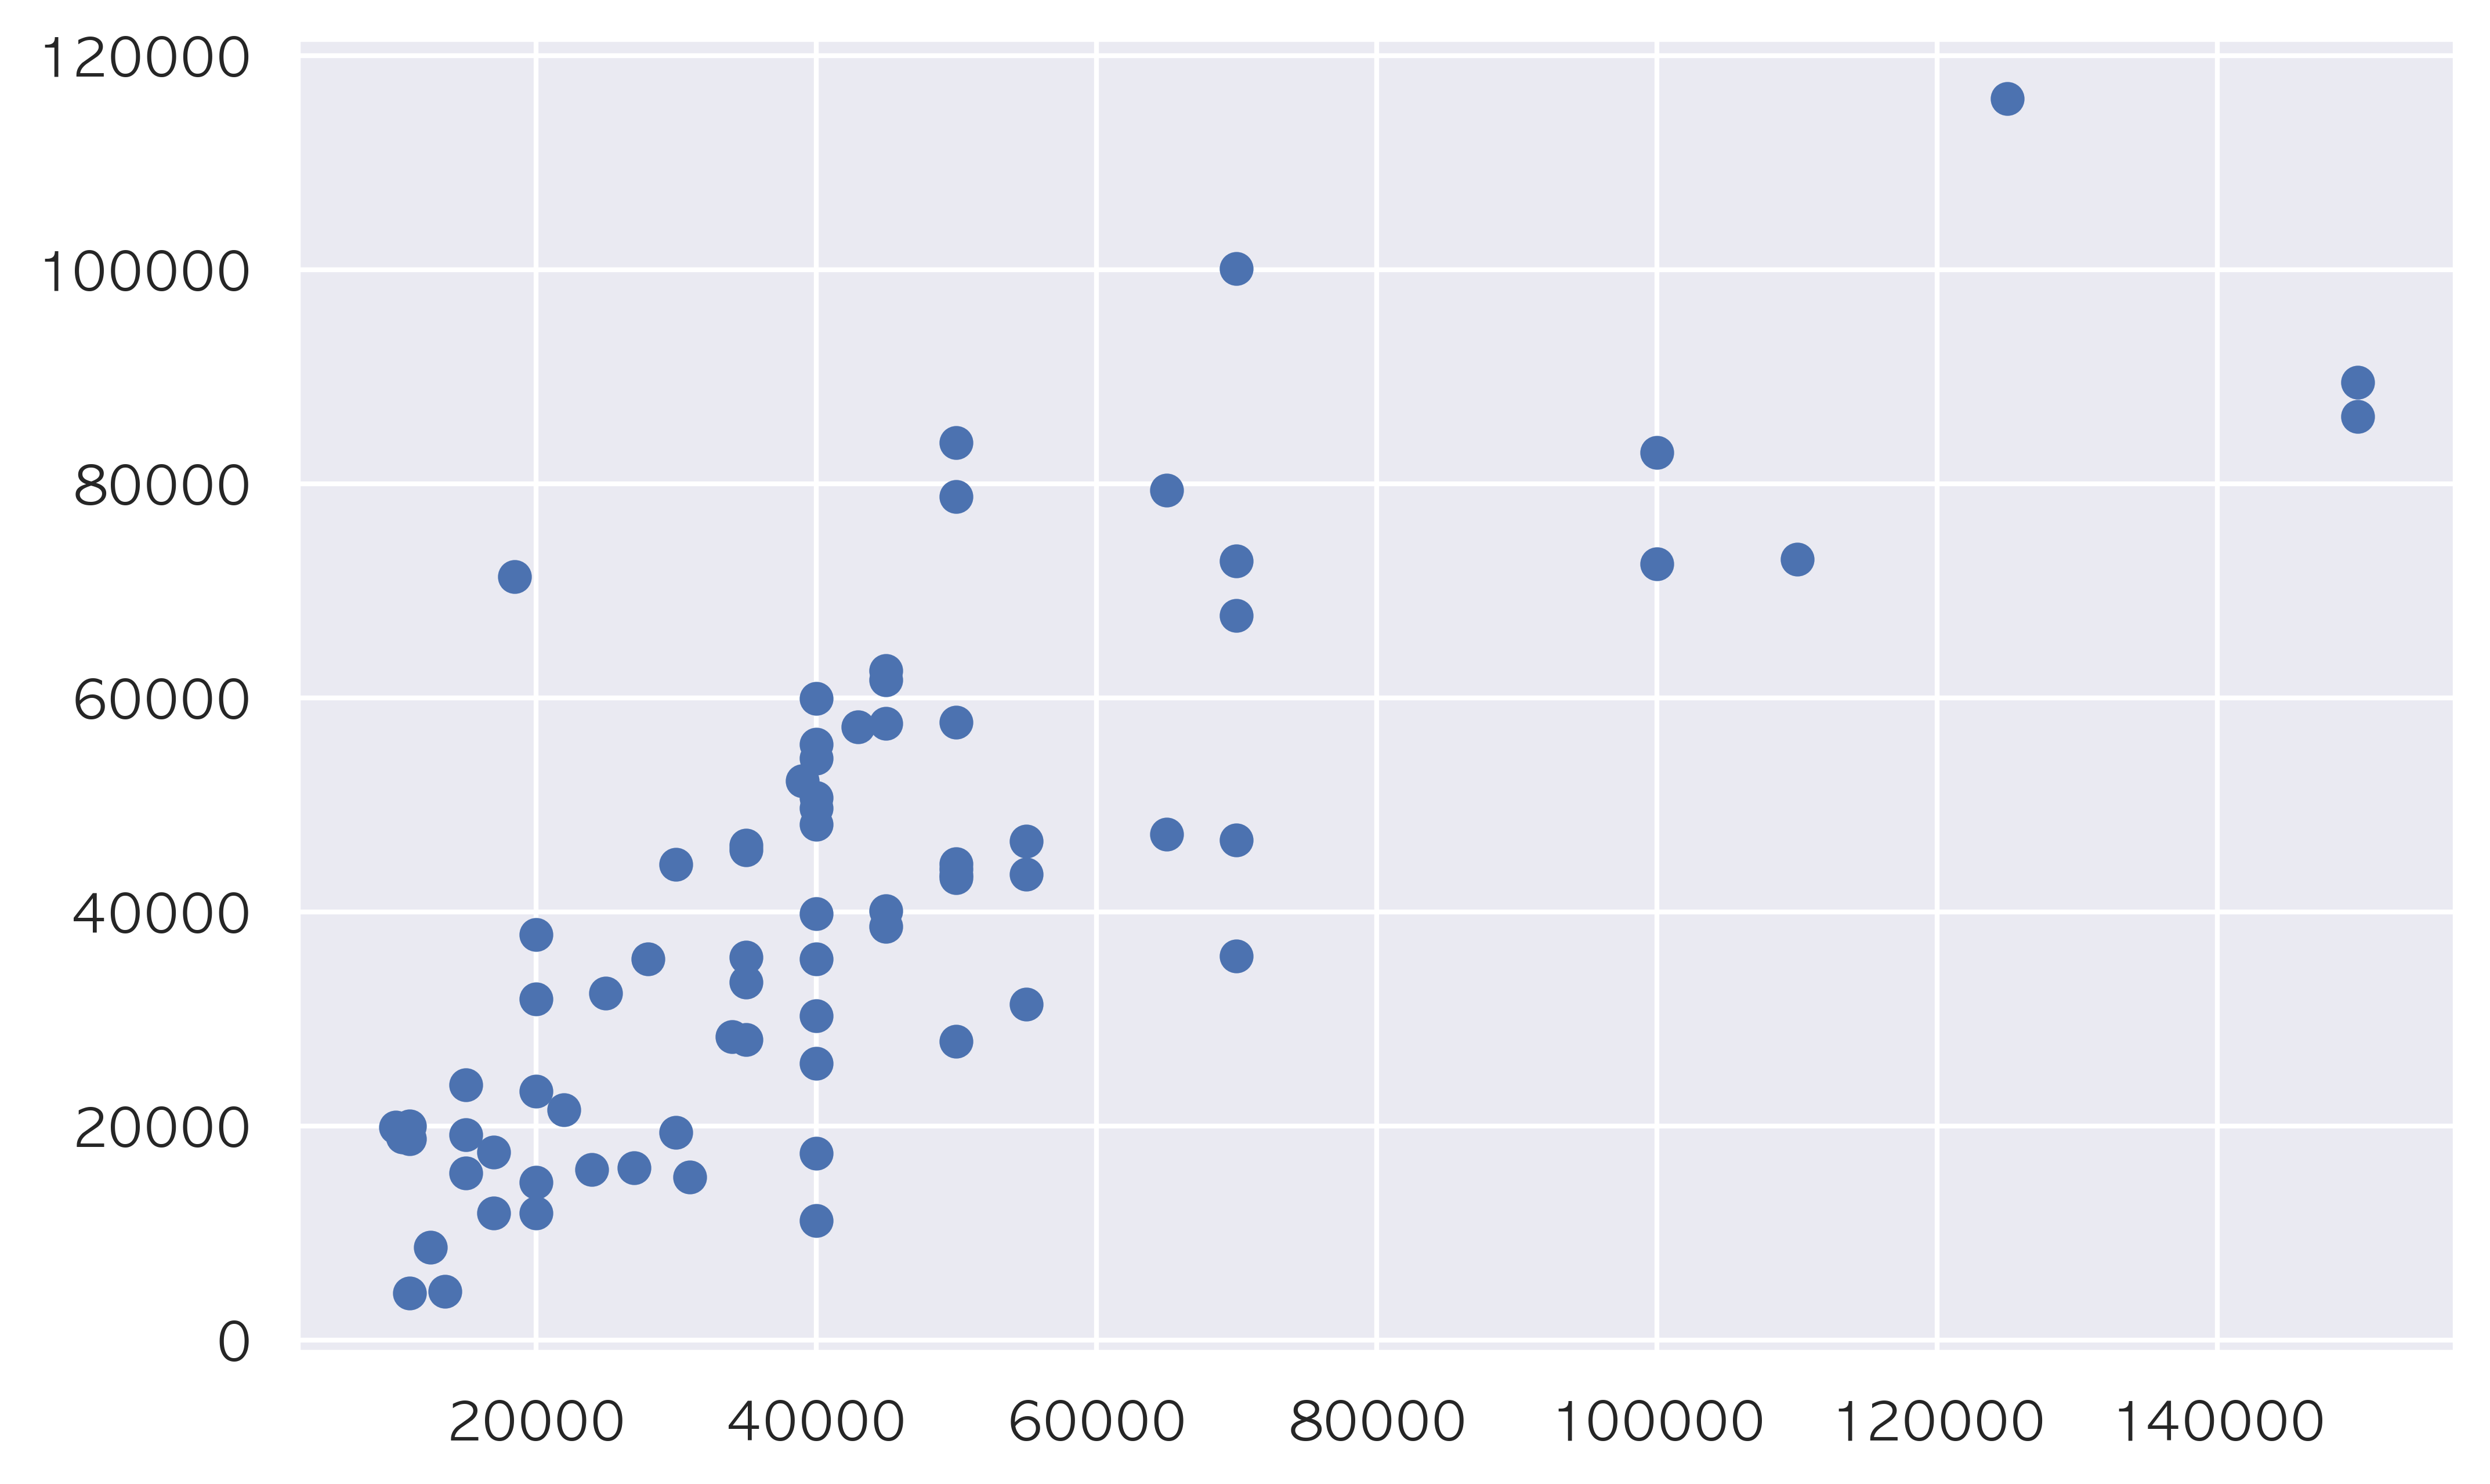

In [47]:
plt.scatter(df_test['연봉'], pred)

In [48]:
df1['로그연봉'] = 1.5 * np.log(df1['연봉'])

In [53]:
model = sm.OLS.from_formula(
    '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N) + scale(수상N)', data=df1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     33.56
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.07e-81
Time:                        20:43:42   Log-Likelihood:                -284.70
No. Observations:                 376   AIC:                             627.4
Df Residuals:                     347   BIC:                             741.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                15.11

In [29]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=1)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    model = sm.OLS.from_formula(
        '로그연봉 ~ C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(홈런) + scale(루타) + scale(도루)\
        +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.로그연봉 - pred) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.71784654, 검증 R2 = 0.66028371
학습 R2 = 0.71036478, 검증 R2 = 0.66470517
학습 R2 = 0.71708049, 검증 R2 = 0.65301615
학습 R2 = 0.71482165, 검증 R2 = 0.65475417
학습 R2 = 0.71548001, 검증 R2 = 0.64300793


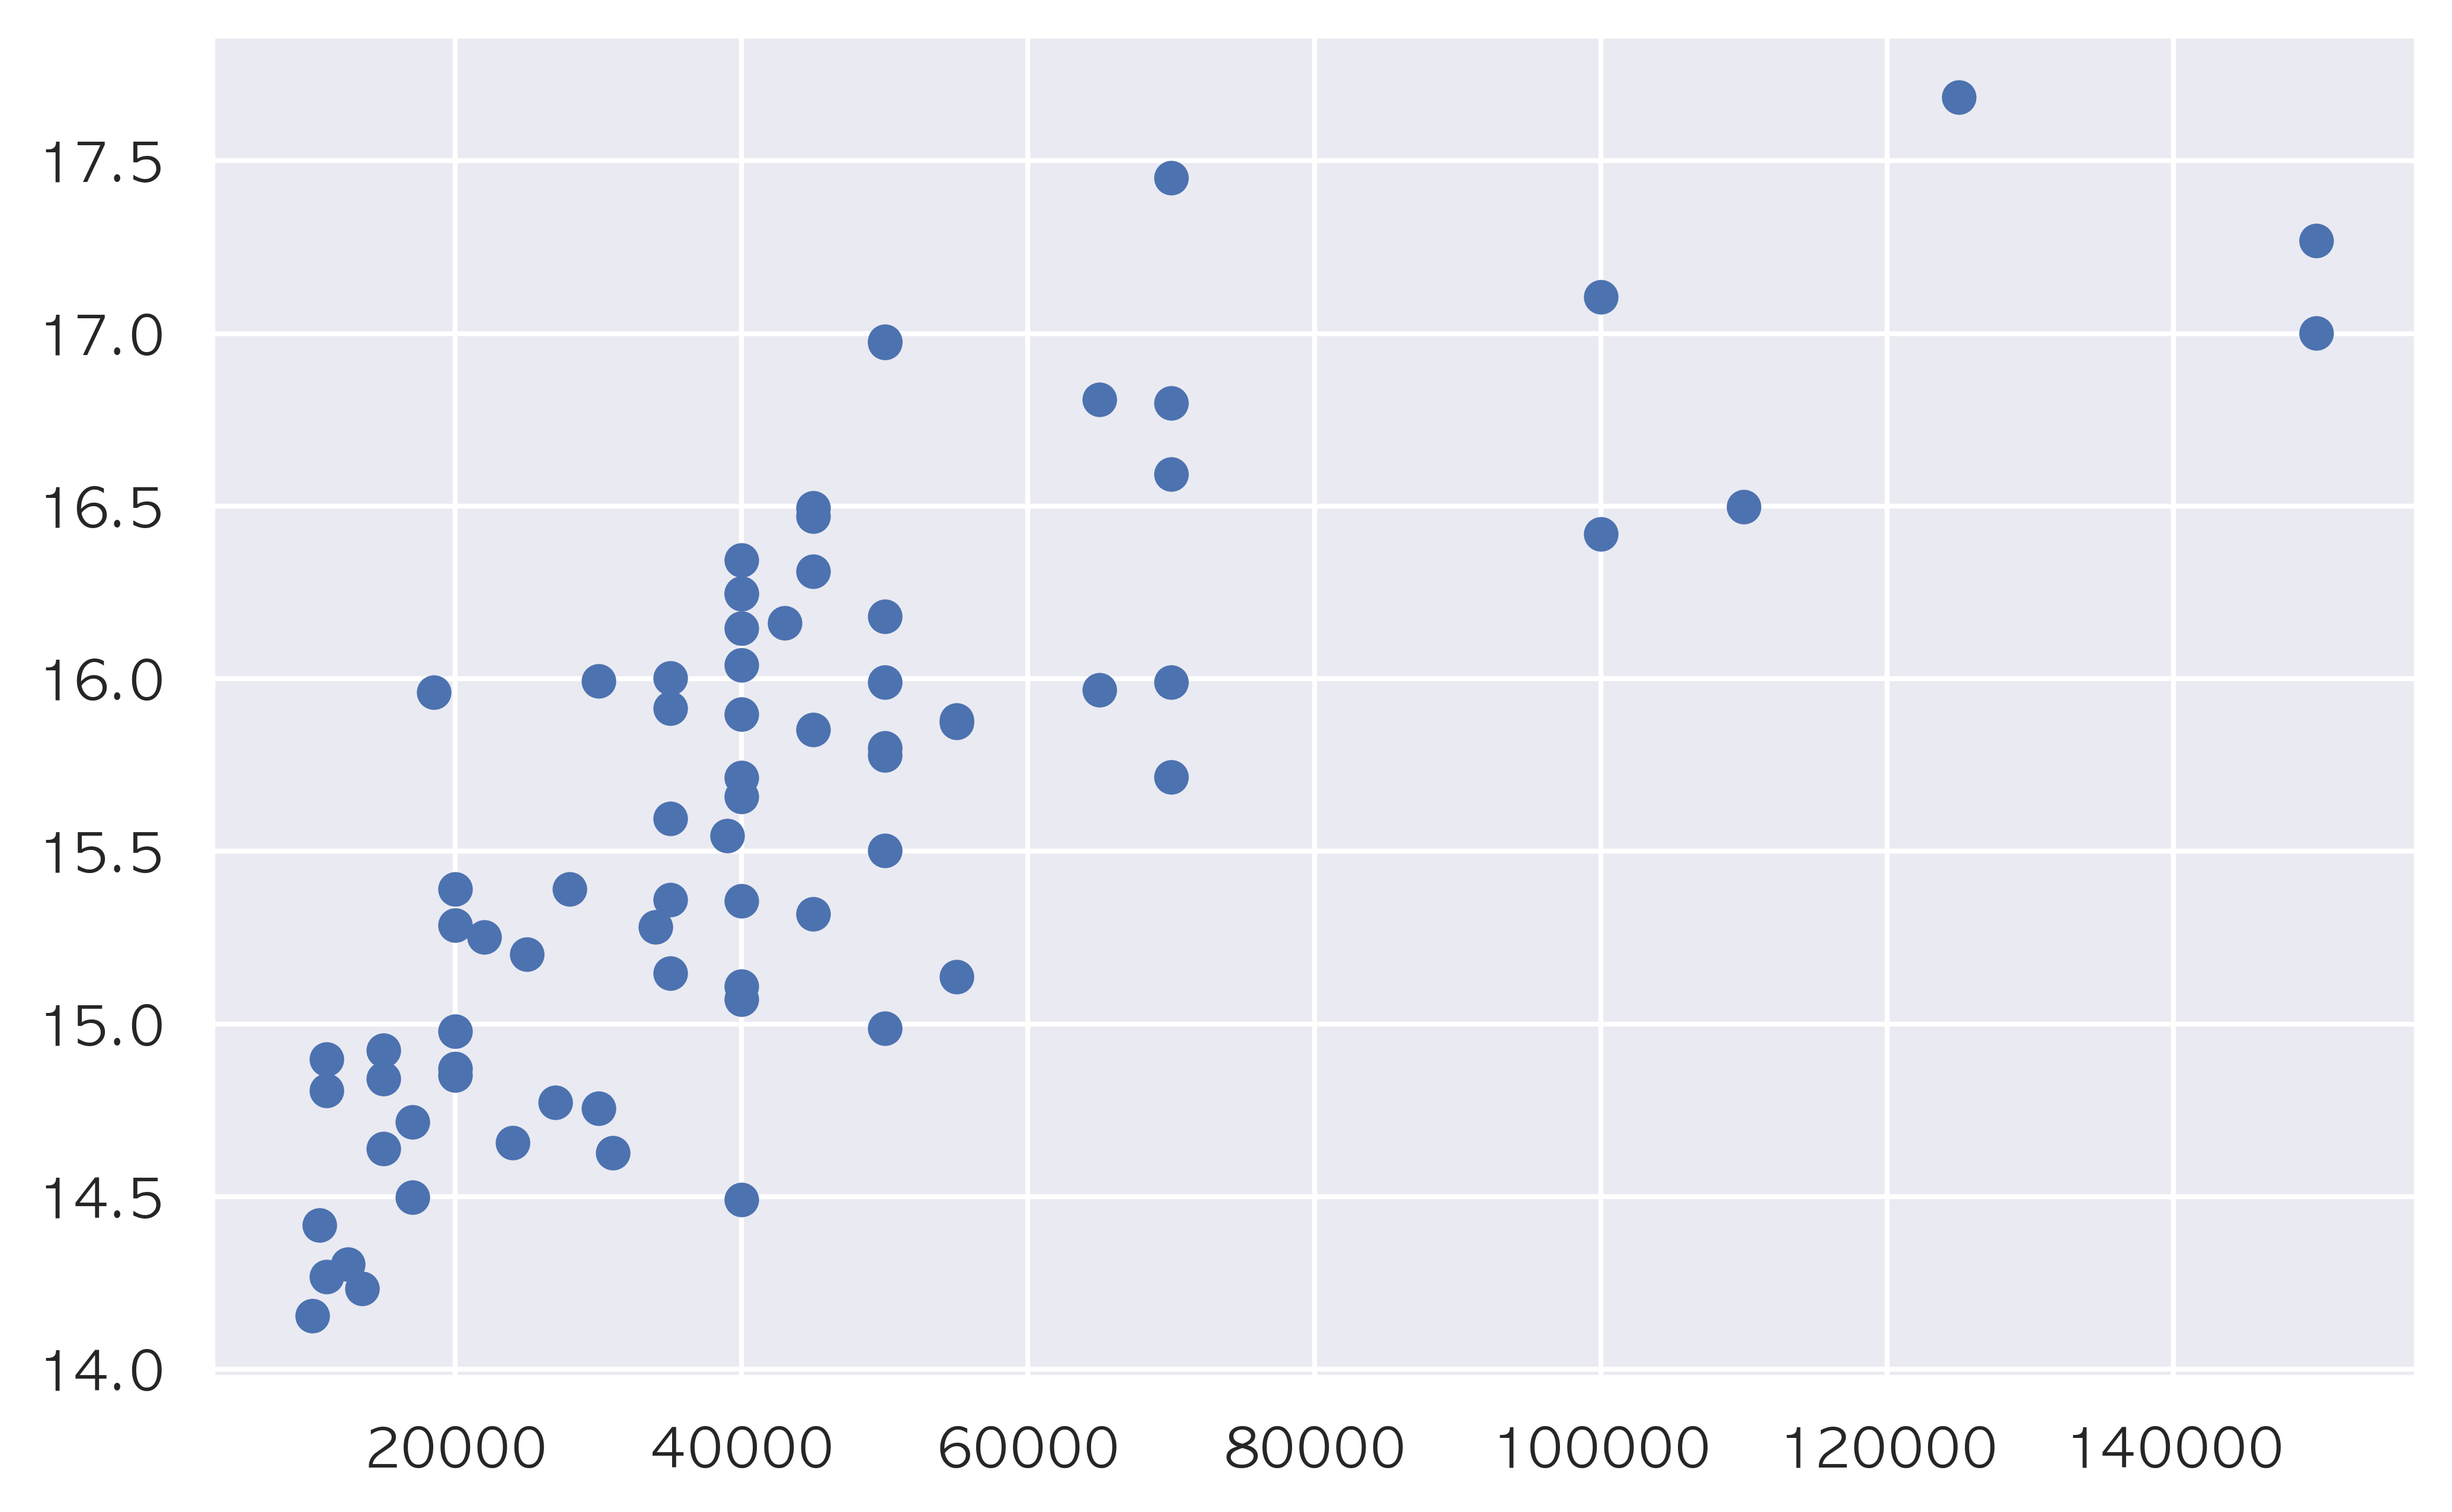

In [30]:
plt.scatter(df_test['연봉'], pred)

In [31]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터의 표준화 잔차")
plt.show()

## 아웃라이어 제거

### 1. 카테고리별 아웃라이어 파악

In [32]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='포지션',y='연봉',data=df, ax=ax[0])
ax[0].set_title("포지션별 연봉 violinplot")

sns.violinplot(x='시즌C',y='연봉',data=df, ax=ax[1])
ax[1].set_title("시즌 카테고리별 연봉 violinplot")

Text(0.5, 1.0, '시즌 카테고리별 연봉 violinplot')

Text(0.5, 1.0, '외국인 여부별 연봉 violinplot')

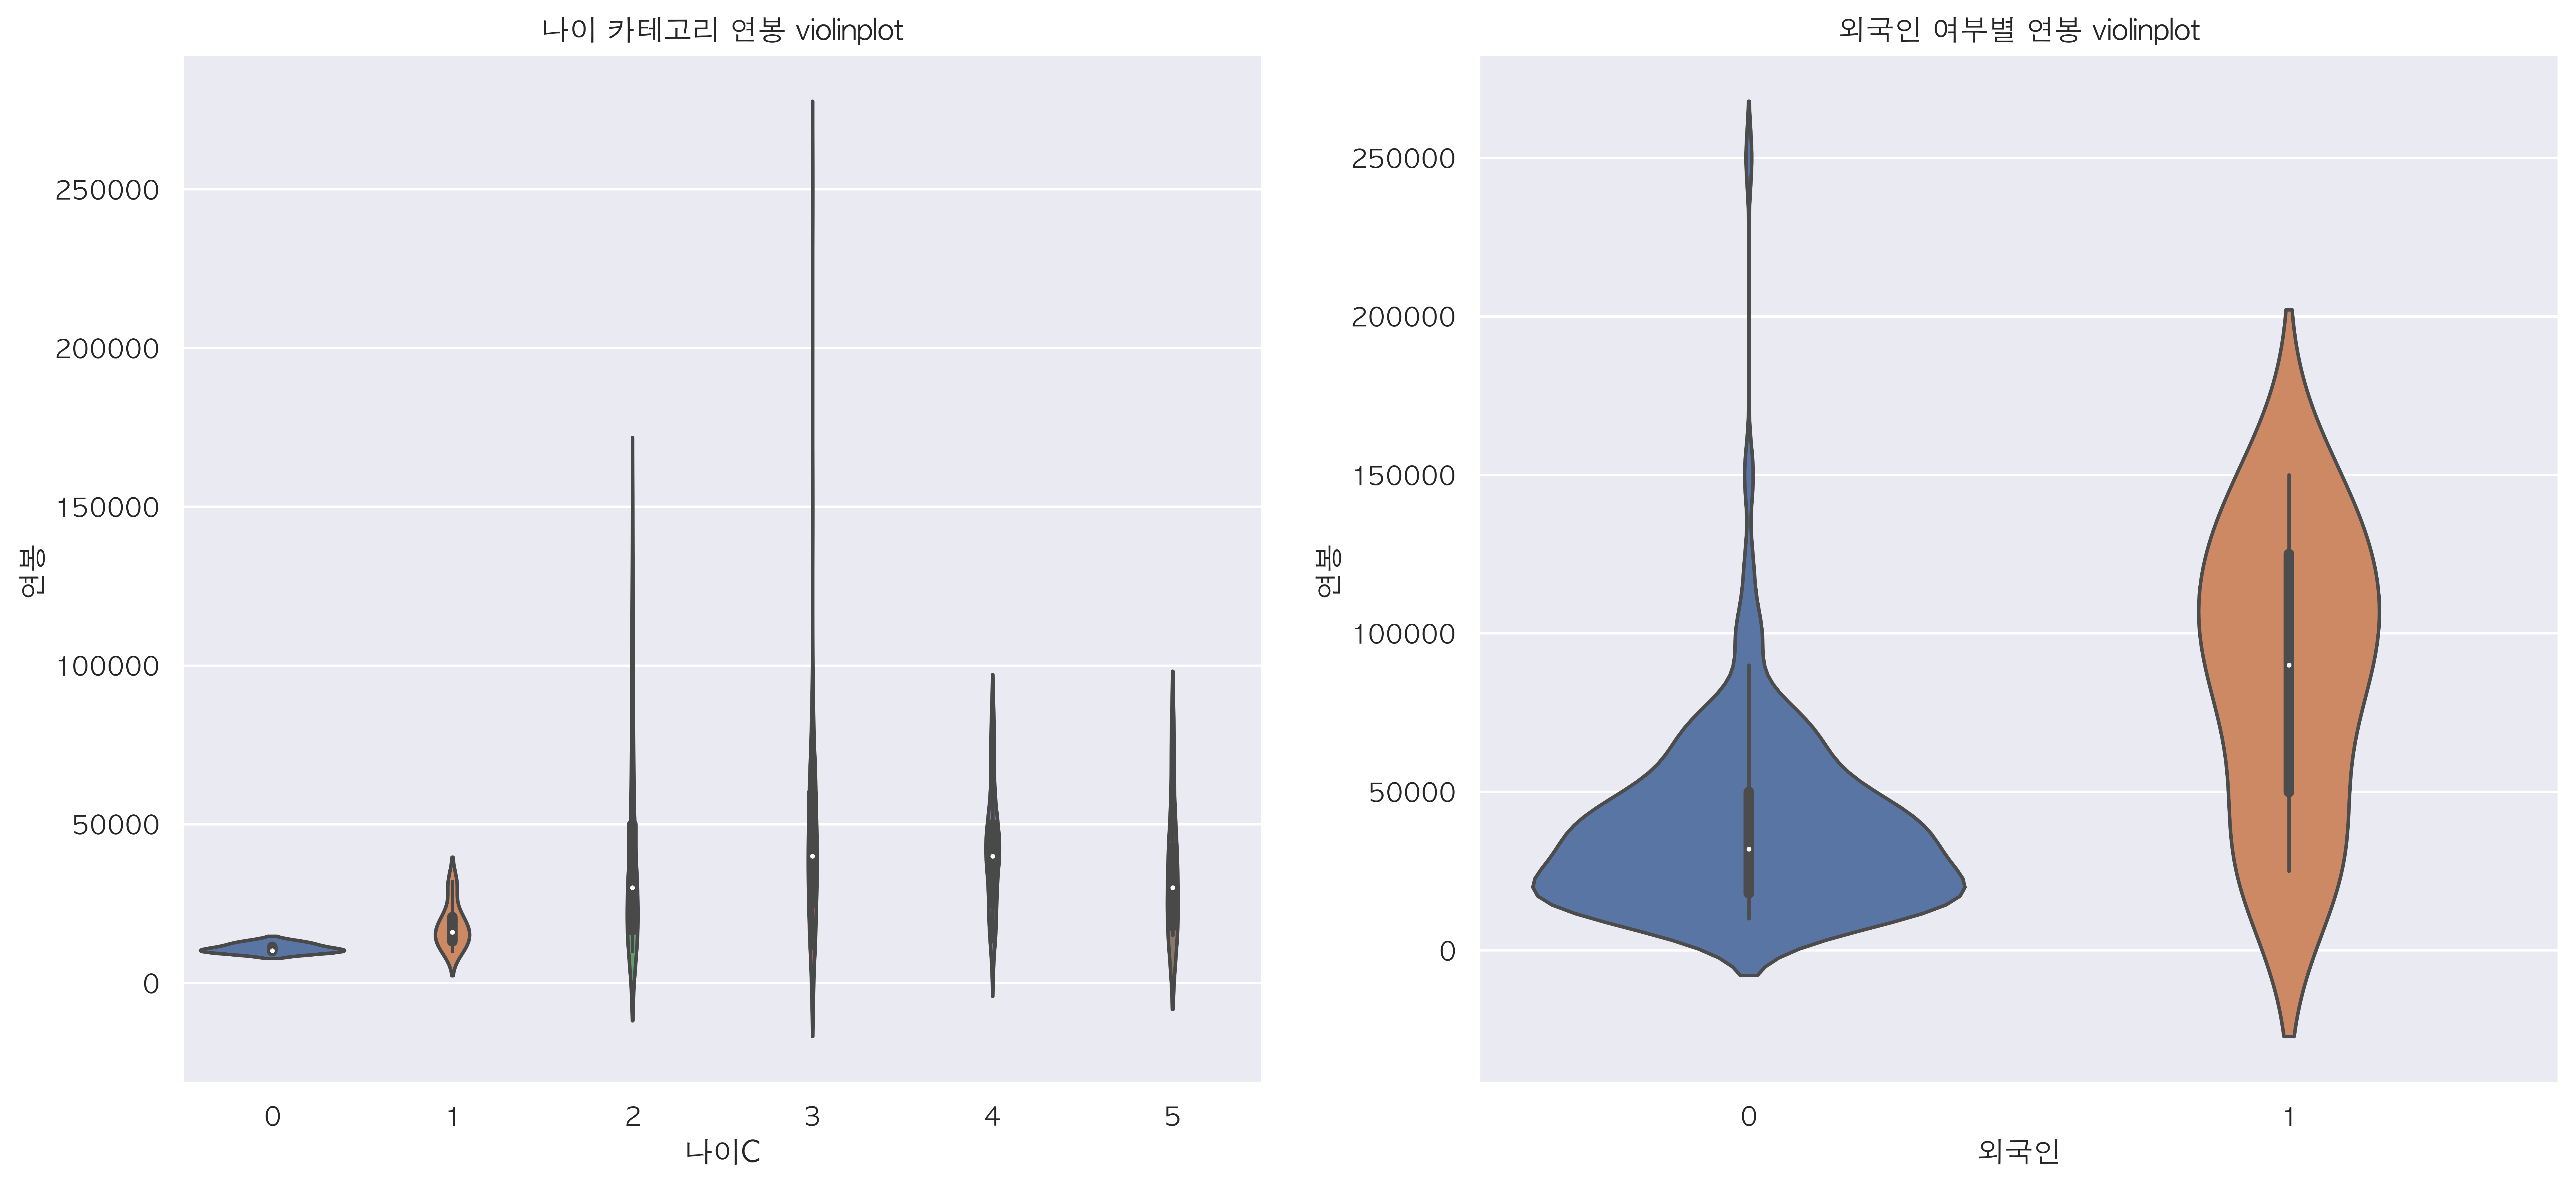

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='나이C', y='연봉',data=df, ax=ax[0])
ax[0].set_title("나이 카테고리 연봉 violinplot")

sns.violinplot(x='외국인',y='연봉',data=df, ax=ax[1])
ax[1].set_title("외국인 여부별 연봉 violinplot")

### 정리
- 1B과 DH에 아웃라이어가 큼
- 시즌 2015년 이후에 아웃라이어가 큼
- 26~37세 사이에 아웃라이어가 큼
- 외국인 중에는 아웃라이어가 없음

In [53]:
# 아웃라이어를 정리하기 위해 아웃라이어의 인덱스를 파악하는 코드

def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[column]
    quantile_20 = np.percentile(fraud.values, 20)
    quantile_80 = np.percentile(fraud.values, 80)
    
    iqr = quantile_80 - quantile_20
    iqr_weight = iqr * weight
    lowest_val = quantile_20 - iqr_weight
    highest_val = quantile_80 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [54]:
# 연봉 아웃라이어 인덱스 파악
get_outlier(df=df, column='연봉', weight=1.5)

Int64Index([214, 224, 564, 1235, 1240], dtype='int64')

In [46]:
# 19, 24 : 이대호
Lee_outlier_index =[19, 24]


In [67]:
sns.jointplot(x='OPS', y='연봉', data=df)
plt.show()

In [62]:
df.shape

(356, 52)

In [63]:
outlier_index = get_outlier(df=df, column='OPS', weight=1.5)
df.drop(outlier_index, axis=0, inplace=True)
df.shape

(356, 52)

In [64]:
model = sm.OLS.from_formula(
    '로그연봉 ~ +C(포지션) + C(시즌C)+ C(나이C):scale(횟수) + scale(G) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +scale(이적) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     33.61
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.54e-78
Time:                        12:31:43   Log-Likelihood:                -258.46
No. Observations:                 356   AIC:                             572.9
Df Residuals:                     328   BIC:                             681.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0778    

Text(0.5, 1.0, '시즌 카테고리별 연봉 violinplot')

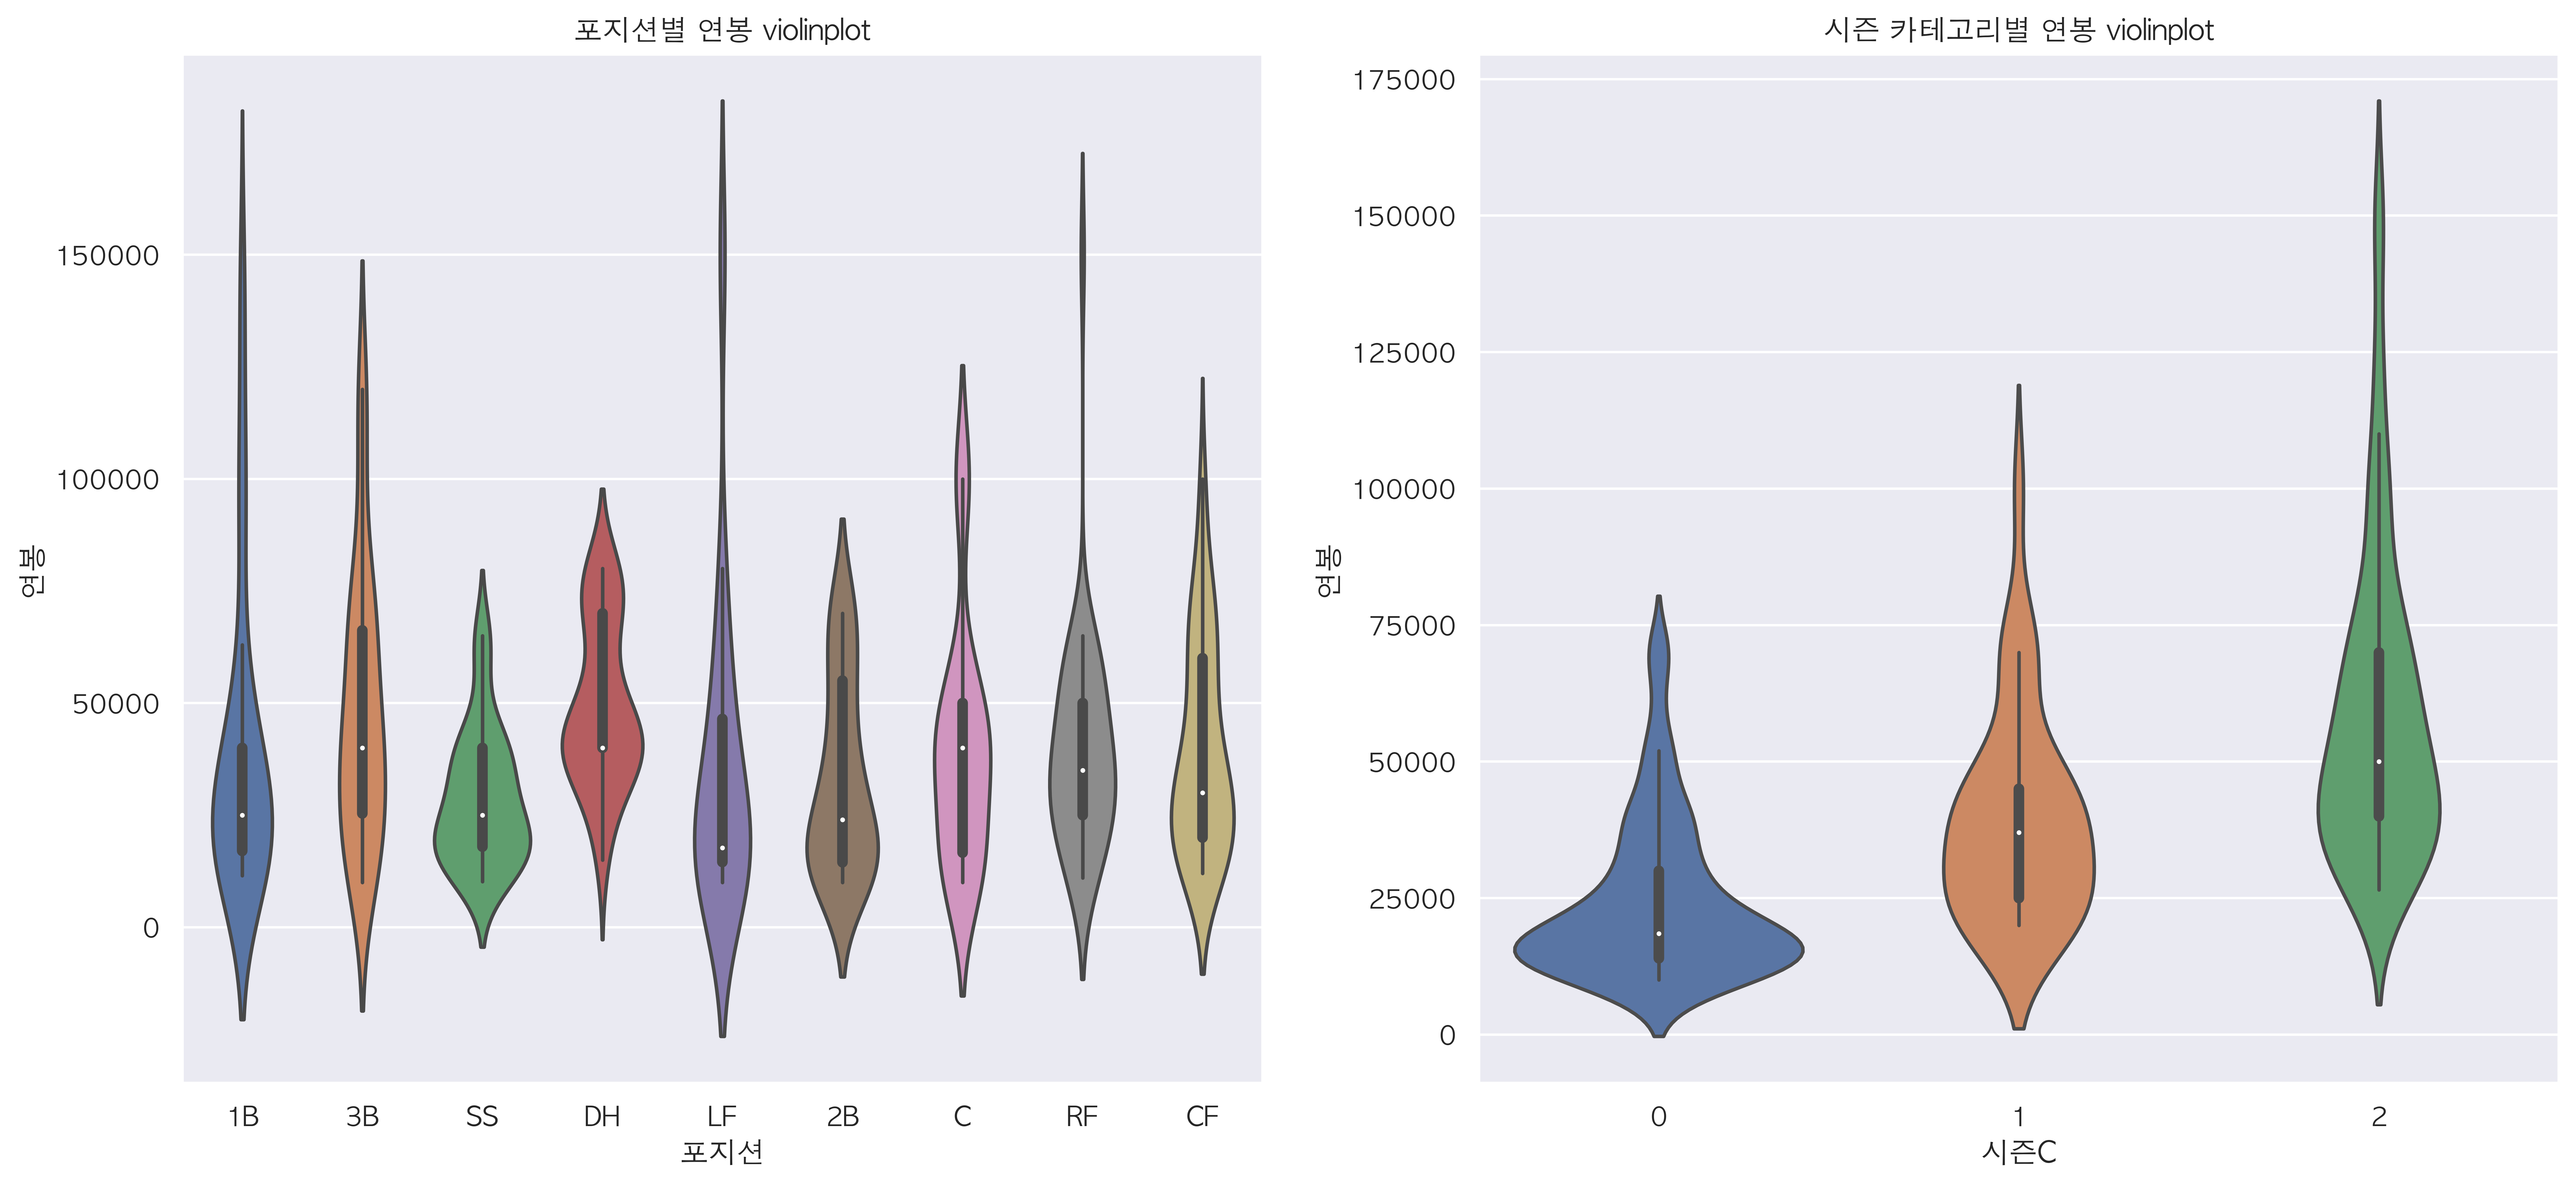

In [66]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='포지션',y='연봉',data=df, ax=ax[0])
ax[0].set_title("포지션별 연봉 violinplot")

sns.violinplot(x='시즌C',y='연봉',data=df, ax=ax[1])
ax[1].set_title("시즌 카테고리별 연봉 violinplot")

### PCA

In [36]:
df.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '학력', '계약',
       '시즌C', '경험N', '외국인', 'BABIP', '이적', '이적C', '나이C', 'K', '로그연봉'],
      dtype='object')

```python
# 아웃라이어 제거
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(df['OPS']) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx2 = list(set(range(len(df))).difference(idx))
df1 = df.iloc[idx2, :].reset_index(drop=True)
```